# AIFM - Mini Project 1

### Import required modules

In [130]:
import pprint
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

pp = pprint.PrettyPrinter()
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

### 1) Download the close prices for the constituents of Sensex.

In [3]:
#Sensex constituents list
mkts_list = [
  'ASIANPAINT.BO','AXISBANK.BO','BAJAJ-AUTO.BO','BAJFINANCE.BO','BAJAJFINSV.BO','BHARTIARTL.BO', 'DRREDDY.BO','HCLTECH.BO','HDFC.BO', 'HDFCBANK.BO','HINDUNILVR.BO','ICICIBANK.BO','INDUSINDBK.BO','INFY.BO','ITC.BO','KOTAKBANK.BO','LT.BO','M&M.BO','MARUTI.BO','NESTLEIND.BO', 'NTPC.BO','ONGC.BO','POWERGRID.BO',
  'RELIANCE.BO','SBIN.BO','SUNPHARMA.BO','TCS.BO','TECHM.BO','TITAN.BO','ULTRACEMCO.BO'
]

df_mkts = yf.download(tickers=mkts_list)['Adj Close']
df_mkts.head()

[*********************100%***********************]  30 of 30 completed


,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJAJFINSV.BO,BAJFINANCE.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Price start dates of all markets

In [24]:
start_dates = {}
def print_start_date(column):
  x = column.notnull()
  start_dates[column.name] = column[x].index[0].strftime("%Y-%d-%m")

df_mkts.apply(print_start_date)
pp.pprint(start_dates)
  

{'ASIANPAINT.BO': '2000-03-01',
 'AXISBANK.BO': '1998-27-11',
 'BAJAJ-AUTO.BO': '2008-26-05',
 'BAJAJFINSV.BO': '2000-03-01',
 'BAJFINANCE.BO': '2000-10-03',
 'BHARTIARTL.BO': '2002-20-02',
 'DRREDDY.BO': '1992-04-03',
 'HCLTECH.BO': '2000-03-01',
 'HDFC.BO': '2000-03-01',
 'HDFCBANK.BO': '1995-01-06',
 'HINDUNILVR.BO': '1991-04-01',
 'ICICIBANK.BO': '2000-03-01',
 'INDUSINDBK.BO': '2002-14-01',
 'INFY.BO': '1995-11-05',
 'ITC.BO': '1991-04-01',
 'KOTAKBANK.BO': '1996-18-03',
 'LT.BO': '1991-04-01',
 'M&M.BO': '1991-04-01',
 'MARUTI.BO': '2003-09-07',
 'NESTLEIND.BO': '1991-04-01',
 'NTPC.BO': '2004-05-11',
 'ONGC.BO': '1996-18-03',
 'POWERGRID.BO': '2007-05-10',
 'RELIANCE.BO': '1995-10-07',
 'SBIN.BO': '1995-11-05',
 'SUNPHARMA.BO': '1994-26-12',
 'TCS.BO': '2002-14-01',
 'TECHM.BO': '2006-28-08',
 'TITAN.BO': '1995-11-05',
 'ULTRACEMCO.BO': '2000-03-01'}


#### Forward fill na and drop the remaining rows that have na

In [26]:
df_mkts = df_mkts.fillna(method='ffill')
df_mkts.dropna(inplace=True)

df_mkts.apply(print_start_date)
pp.pprint(start_dates)

{'ASIANPAINT.BO': '2008-26-05',
 'AXISBANK.BO': '2008-26-05',
 'BAJAJ-AUTO.BO': '2008-26-05',
 'BAJAJFINSV.BO': '2008-26-05',
 'BAJFINANCE.BO': '2008-26-05',
 'BHARTIARTL.BO': '2008-26-05',
 'DRREDDY.BO': '2008-26-05',
 'HCLTECH.BO': '2008-26-05',
 'HDFC.BO': '2008-26-05',
 'HDFCBANK.BO': '2008-26-05',
 'HINDUNILVR.BO': '2008-26-05',
 'ICICIBANK.BO': '2008-26-05',
 'INDUSINDBK.BO': '2008-26-05',
 'INFY.BO': '2008-26-05',
 'ITC.BO': '2008-26-05',
 'KOTAKBANK.BO': '2008-26-05',
 'LT.BO': '2008-26-05',
 'M&M.BO': '2008-26-05',
 'MARUTI.BO': '2008-26-05',
 'NESTLEIND.BO': '2008-26-05',
 'NTPC.BO': '2008-26-05',
 'ONGC.BO': '2008-26-05',
 'POWERGRID.BO': '2008-26-05',
 'RELIANCE.BO': '2008-26-05',
 'SBIN.BO': '2008-26-05',
 'SUNPHARMA.BO': '2008-26-05',
 'TCS.BO': '2008-26-05',
 'TECHM.BO': '2008-26-05',
 'TITAN.BO': '2008-26-05',
 'ULTRACEMCO.BO': '2008-26-05'}


### 2) Calculate 3 month returns of each stock

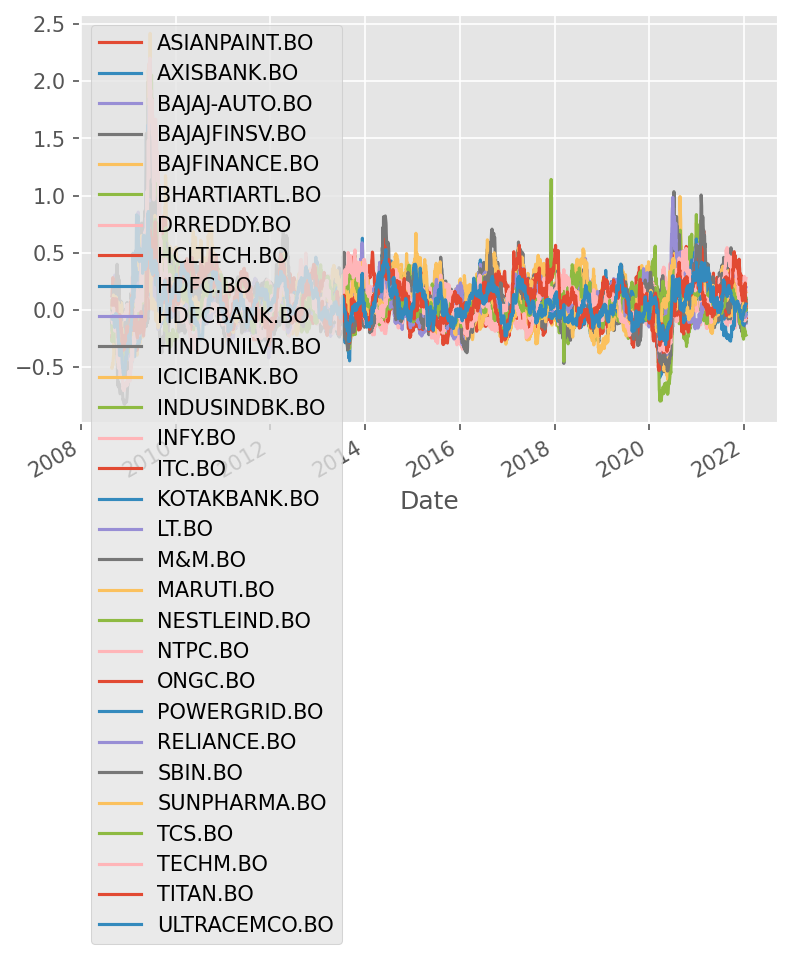

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJAJFINSV.BO,BAJFINANCE.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-11,0.103055,-0.045452,-0.088988,0.010202,-0.008738,0.017645,-0.057686,0.062158,-0.013646,-0.030556,...,-0.077084,-0.007144,0.102604,-0.041130,0.106748,0.039525,0.029768,0.265467,0.234954,0.032089
2022-01-12,0.079271,-0.038813,-0.101763,0.027658,0.003278,0.054148,-0.041177,0.042758,0.002968,-0.033949,...,-0.062347,0.066054,0.103624,-0.020042,0.114473,0.016039,-0.007180,0.231999,0.099445,0.040605
2022-01-13,0.046644,-0.052834,-0.095589,0.038298,0.008661,0.051984,-0.025355,0.016722,0.013051,-0.046093,...,-0.043586,0.055968,0.124234,-0.050733,0.117107,0.054057,-0.007667,0.205627,0.110751,0.037224
2022-01-14,0.019512,-0.083217,-0.107821,0.027576,0.001753,0.043283,-0.041836,0.035510,-0.012896,-0.054517,...,-0.065262,0.011517,0.090003,-0.042416,0.083227,0.033209,0.078764,0.254458,0.096750,0.043653
2022-01-17,0.006936,-0.108156,-0.116788,0.005081,0.000185,0.067589,-0.045630,0.019072,-0.019688,-0.062419,...,-0.054288,0.050269,0.088487,-0.048659,0.066032,0.033832,0.102661,0.276352,0.038006,0.051025


In [95]:
df_mkts_rets_q = df_mkts.pct_change(periods=66)
df_mkts_rets_q.tail()

## Down sample the data by fetching month end value

In [93]:
df_mkts_returns_month_end = df_mkts_rets_q.resample('BM').last()
df_mkts_returns_month_end.head()

ASIANPAINT.BO   -0.005331
AXISBANK.BO     -0.107918
BAJAJ-AUTO.BO    0.010464
BAJAJFINSV.BO   -0.161890
BAJFINANCE.BO   -0.495446
BHARTIARTL.BO   -0.053584
DRREDDY.BO      -0.145810
HCLTECH.BO      -0.238755
HDFC.BO         -0.057420
HDFCBANK.BO     -0.055009
HINDUNILVR.BO    0.046232
ICICIBANK.BO    -0.166556
INDUSINDBK.BO   -0.232676
INFY.BO         -0.072611
ITC.BO          -0.131683
KOTAKBANK.BO    -0.140296
LT.BO           -0.038626
M&M.BO          -0.076402
MARUTI.BO       -0.157562
NESTLEIND.BO    -0.020546
NTPC.BO         -0.004116
ONGC.BO          0.170154
POWERGRID.BO    -0.069465
RELIANCE.BO     -0.152688
SBIN.BO         -0.062892
SUNPHARMA.BO     0.013996
TCS.BO          -0.188060
TECHM.BO        -0.095514
TITAN.BO         0.070965
ULTRACEMCO.BO   -0.082175
Name: 2008-08-29 00:00:00, dtype: float64


,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJAJFINSV.BO,BAJFINANCE.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-29,-0.005331,-0.107918,0.010464,-0.161890,-0.495446,-0.053584,-0.145810,-0.238755,-0.057420,-0.055009,...,-0.004116,0.170154,-0.069465,-0.152688,-0.062892,0.013996,-0.188060,-0.095514,0.070965,-0.082175
2008-09-30,0.011649,0.065434,0.275759,-0.358529,-0.320968,0.023066,-0.207167,-0.292758,-0.031088,0.161132,...,0.108262,0.205571,0.030302,-0.130803,0.205057,0.101304,-0.241456,-0.150005,0.068436,-0.100954


## Get top 5 stocks at the end of each month

In [259]:
def get_topn_stocks_df(df):
  def get_topn_stocks(row, n):
    x = row.nlargest(n)
    return list(x.keys())
    
    # stocks = []
    # for k,v in x.items():
    #   stocks.append(k)
    # return stocks
  
  result = df.apply(lambda row: get_topn_stocks(row, 5), axis=1)
  
  return pd.DataFrame(result.values.tolist(), index=result.keys()).dropna()

df_top5 = get_topn_stocks_df(df_mkts_returns_month_end)
df_top5


,0,1,2,3,4
Date,,,,,
2008-08-29,ONGC.BO,TITAN.BO,HINDUNILVR.BO,SUNPHARMA.BO,BAJAJ-AUTO.BO
2008-09-30,BAJAJ-AUTO.BO,ONGC.BO,SBIN.BO,HINDUNILVR.BO,HDFCBANK.BO
2008-10-31,BAJAJ-AUTO.BO,HINDUNILVR.BO,NESTLEIND.BO,MARUTI.BO,TITAN.BO
2008-11-28,HINDUNILVR.BO,ITC.BO,NTPC.BO,MARUTI.BO,BHARTIARTL.BO
2008-12-31,HINDUNILVR.BO,NTPC.BO,DRREDDY.BO,ITC.BO,BHARTIARTL.BO
...,...,...,...,...,...
2021-09-30,BAJAJFINSV.BO,TECHM.BO,HCLTECH.BO,NTPC.BO,BHARTIARTL.BO
2021-10-29,TITAN.BO,ONGC.BO,TECHM.BO,BAJAJFINSV.BO,BHARTIARTL.BO
2021-11-30,ONGC.BO,TITAN.BO,POWERGRID.BO,NTPC.BO,BHARTIARTL.BO


## Daily returns of all markets

In [260]:
daily_returns = df_mkts.pct_change()
daily_returns.tail()

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJAJFINSV.BO,BAJFINANCE.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-11,-0.005105,0.000875,-0.000116,-0.000595,-0.007724,-0.001561,-0.004889,0.042952,0.019022,0.004394,...,0.003794,0.016099,-0.000490,0.007076,0.004766,0.007199,0.009396,0.012493,-0.002314,0.002717
2022-01-12,0.002121,0.004304,0.001062,0.008447,0.013561,0.037592,0.004228,0.005246,0.009666,-0.005844,...,0.011716,0.024542,0.004659,0.026763,0.008301,0.004565,-0.014952,-0.005465,-0.014597,0.006780
2022-01-13,-0.024715,-0.008371,0.003126,0.015573,0.003853,0.002055,0.007536,-0.013175,0.006833,-0.018117,...,0.008218,-0.006064,0.014889,0.005852,0.002254,0.035338,0.010474,-0.005697,0.002354,-0.005898
2022-01-14,-0.026600,-0.025392,-0.003956,-0.001366,0.003614,-0.014831,-0.008030,0.003225,-0.015242,0.011058,...,0.002964,-0.017694,-0.000481,0.001321,-0.005965,-0.006353,0.018370,0.011780,-0.010196,0.005966
2022-01-17,-0.006821,-0.014967,0.022436,0.006506,0.003480,0.016928,-0.000896,-0.055587,-0.004551,-0.011422,...,0.010344,0.029503,-0.002166,0.000000,0.013281,-0.003604,0.013113,-0.001294,-0.001080,-0.004291


## Build the strategy

In [261]:
columns = ['stock_1', 'stock_2', 'stock_3', 'stock_4', 'stock_5']
df_strategy = pd.DataFrame()

for i in range(len(df_top5)):
  if i + 1  < len(df_top5):
    current_month = df_top5.iloc[i]
    next_month = df_top5.iloc[i+1]
  
  filter = ((daily_returns.index > current_month.name) & (daily_returns.index <= next_month.name))
  df = daily_returns[filter][current_month.values]
  
  df.columns = columns
  df_strategy = df_strategy.append(df)

df_strategy


,stock_1,stock_2,stock_3,stock_4,stock_5
Date,,,,,
2008-09-01,0.006352,-0.000669,-0.014059,0.021955,-0.004084
2008-09-02,0.069674,0.006337,0.020872,0.015184,0.033237
2008-09-04,-0.029686,-0.026713,-0.024899,-0.013128,0.005210
2008-09-05,0.001778,-0.010126,0.017646,-0.006949,-0.002057
2008-09-08,0.040218,-0.007673,0.027540,0.025559,-0.019042
...,...,...,...,...,...
2022-01-11,0.012493,-0.002314,-0.000490,0.007199,0.002674
2022-01-12,-0.005465,-0.014597,0.004659,0.004565,0.011611
2022-01-13,-0.005697,0.002354,0.014889,0.035338,0.010332


## Cummulative return on $1,000 invested in the strategy

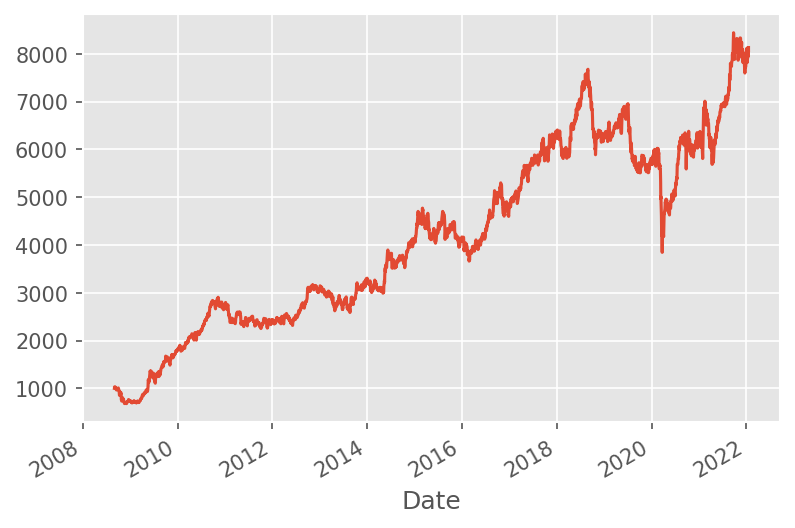

In [262]:
# Define the investment
investment = 1000

# Calculate the mean of returns
df_strategy['portfolio_returns'] = df_strategy.mean(axis=1)

# Calculate cumulative returns
returns_plus_one = df_strategy['portfolio_returns'].add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot investment return
cumulative_return.mul(investment).plot()
plt.show()


In [263]:
df_strategy['port_value'] = cumulative_return.mul(investment)
df_strategy.head()

,stock_1,stock_2,stock_3,stock_4,stock_5,portfolio_returns,port_value
Date,,,,,,,
2008-09-01,0.006352,-0.000669,-0.014059,0.021955,-0.004084,0.001899,1001.899045
2008-09-02,0.069674,0.006337,0.020872,0.015184,0.033237,0.029061,1031.014865
2008-09-04,-0.029686,-0.026713,-0.024899,-0.013128,0.005210,-0.017843,1012.618245
2008-09-05,0.001778,-0.010126,0.017646,-0.006949,-0.002057,0.000058,1012.677232
2008-09-08,0.040218,-0.007673,0.027540,0.025559,-0.019042,0.013320,1026.166395


# Benchmark returns

In [205]:
# Download benchmark data from yfinance
benchmark = yf.download(tickers='^BSESN')['Adj Close']

[*********************100%***********************]  1 of 1 completed


### Calculate the daily benchmark returns

In [234]:
daily_returns_bm = benchmark.pct_change().to_frame(name='bm_returns')
daily_returns_bm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6048 entries, 1997-07-01 to 2022-01-19
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bm_returns  6047 non-null   float64
dtypes: float64(1)
memory usage: 223.5 KB


### Merge benchmark returns with strategy

In [236]:
df_strategy_final = pd.concat([df_strategy, daily_returns_bm.reindex(df_strategy.index)], axis=1)
df_strategy_final['bm_returns'] = df_strategy_final['bm_returns'].fillna(method='ffill')

df_strategy_final.info()
# df_strategy_final[pd.isnull(df_strategy_final['bm_returns'])]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3306 entries, 2008-09-01 to 2022-01-17
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stock_1            3306 non-null   float64
 1   stock_2            3306 non-null   float64
 2   stock_3            3306 non-null   float64
 3   stock_4            3306 non-null   float64
 4   stock_5            3306 non-null   float64
 5   portfolio_returns  3306 non-null   float64
 6   port_value         3306 non-null   float64
 7   bm_returns         3306 non-null   float64
dtypes: float64(8)
memory usage: 232.5 KB


,stock_1,stock_2,stock_3,stock_4,stock_5,portfolio_returns,port_value,bm_returns
Date,,,,,,,,


## Cumulative return on $1,000 invested in benchmark

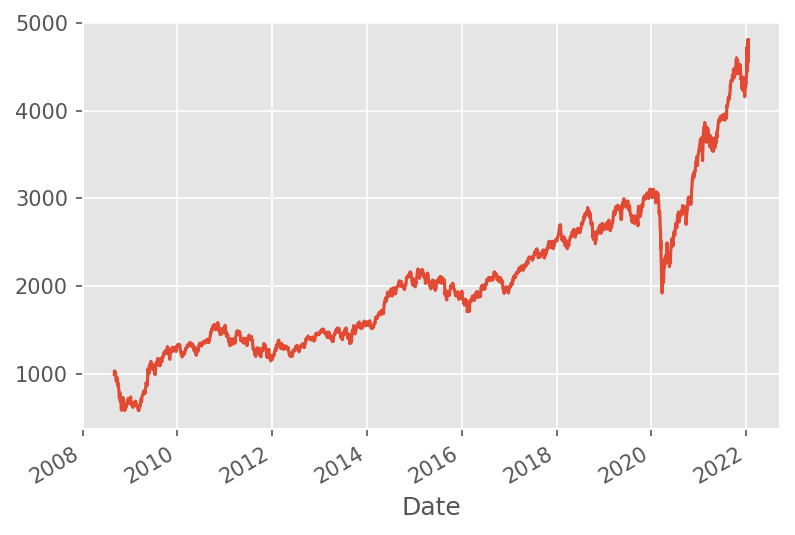

In [237]:
# Define the investment
investment = 1000

# Calculate cumulative returns
returns_plus_one_bm = df_strategy_final['bm_returns'].add(1)
cumulative_return_bm = returns_plus_one_bm.cumprod()

# Calculate and plot investment returns
cumulative_return_bm.mul(investment).plot()
plt.show()

In [238]:
df_strategy_final['bm_value'] = cumulative_return_bm.mul(investment)

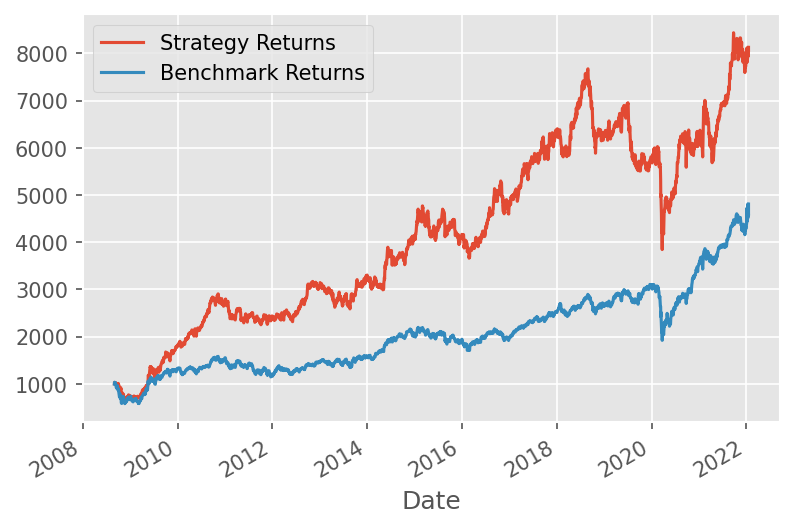

In [244]:
df_strategy_final['port_value'].plot(label = "Strategy Returns")
df_strategy_final['bm_value'].plot(label = "Benchmark Returns")
plt.legend()
plt.show()